In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [61]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("/kaggle/input/vehicle-maintenance-data/vehicle_maintenance_data.csv")

In [63]:
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [65]:
df.describe()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


In [66]:
target = 'Need_Maintenance'
target_series = df[target]
target_series.value_counts()

Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64

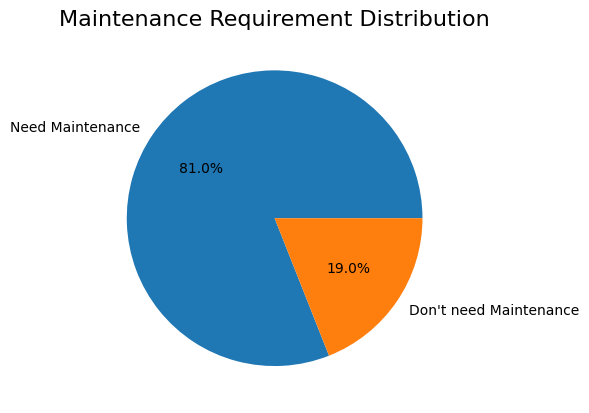

In [67]:
plt.pie(target_series.value_counts(), labels=['Need Maintenance', "Don't need Maintenance"], autopct='%1.1f%%')
plt.title('Maintenance Requirement Distribution', fontsize=16)
plt.show()

Checking for Missing Values

In [68]:
df.isnull().sum()

Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64

There are no missing values in the dataset

In [69]:
df[["Last_Service_Date", "Warranty_Expiry_Date"]] = df[["Last_Service_Date", "Warranty_Expiry_Date"]].apply(pd.to_datetime)

In [70]:
cat_feats = [feat for feat in df.columns if df[feat].dtype=='O']
temporal_feats = ["Last_Service_Date", "Warranty_Expiry_Date"]
num_feats = [feat for feat in df.columns if feat not in cat_feats and feat not in temporal_feats and feat!=target]
print(f"Categorical features: {cat_feats}\n")
print(f"Temporal features: {temporal_feats}\n")
print(f"Numerical features: {num_feats}\n")
print(f"Target Variable: {target}\n")

Categorical features: ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type', 'Owner_Type', 'Tire_Condition', 'Brake_Condition', 'Battery_Status']

Temporal features: ['Last_Service_Date', 'Warranty_Expiry_Date']

Numerical features: ['Mileage', 'Reported_Issues', 'Vehicle_Age', 'Engine_Size', 'Odometer_Reading', 'Insurance_Premium', 'Service_History', 'Accident_History', 'Fuel_Efficiency']

Target Variable: Need_Maintenance



# Countplot of Categorical Features by Target Variable

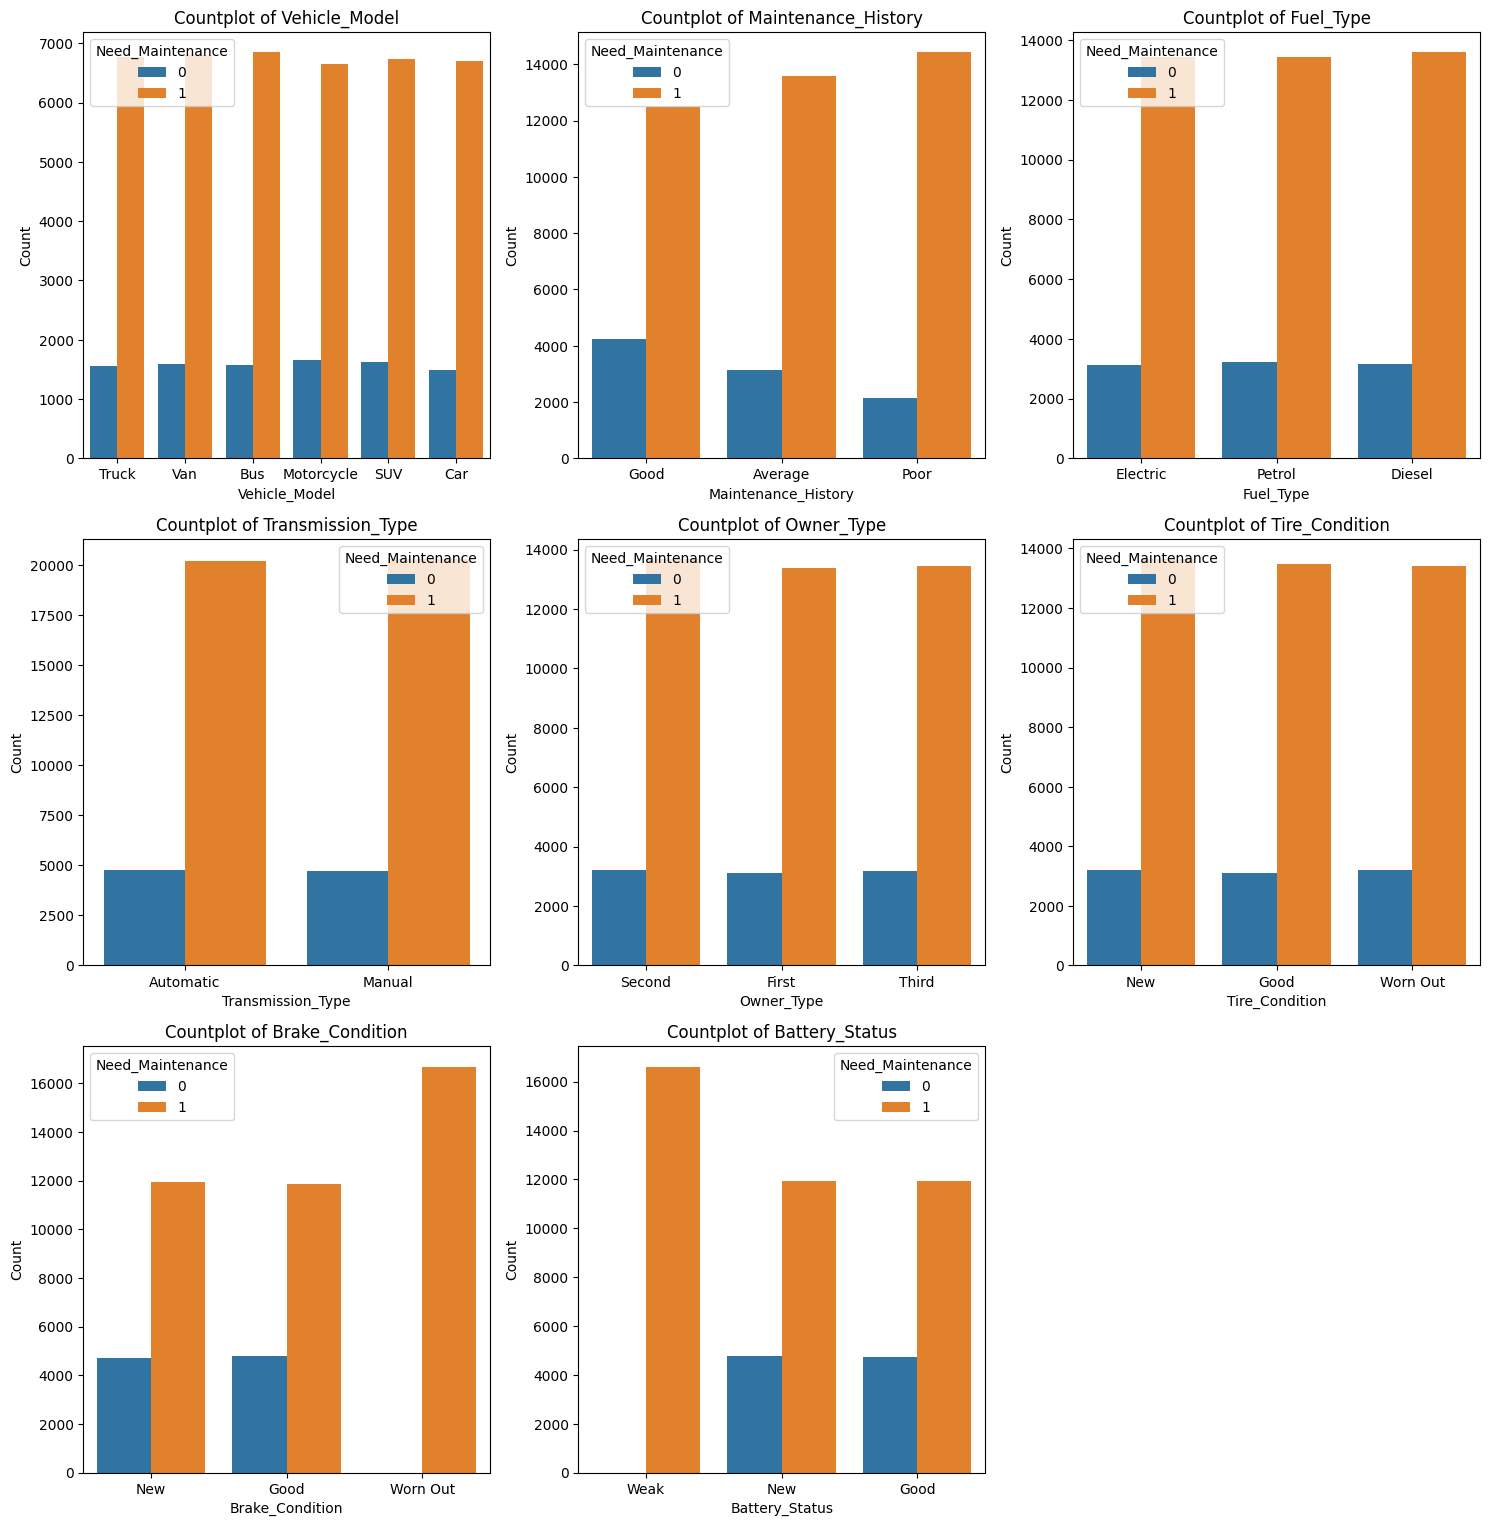

In [71]:
num_features = len(cat_feats)
ncols = 3
nrows = (num_features // ncols) + (num_features % ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()

for i, feat in enumerate(cat_feats):
    sns.countplot(data=df, x=feat, hue=target, ax=axes[i])
    axes[i].set_title(f"Countplot of {feat}")
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Preprocessing temporal data (dates) into a numerical format that can be fed into machine learning models, improving the predictive power of the model. The new features (Days_Since_Last_Service and Days_To_Warranty_Expiry) are likely to provide valuable information for predicting maintenance needs. For example, a larger gap since the last service or an approaching warranty expiry might increase the likelihood of maintenance needs.

In [72]:
df['Days_Since_Last_Service'] = (pd.Timestamp.now() - df['Last_Service_Date']).dt.days
df['Days_To_Warranty_Expiry'] = (df['Warranty_Expiry_Date'] - pd.Timestamp.now()).dt.days
df = df.drop(['Last_Service_Date', 'Warranty_Expiry_Date'], axis=1)
num_feats = num_feats + ['Days_Since_Last_Service', 'Days_To_Warranty_Expiry']

# Frequency Distribution of Numerical Features by Target Variable

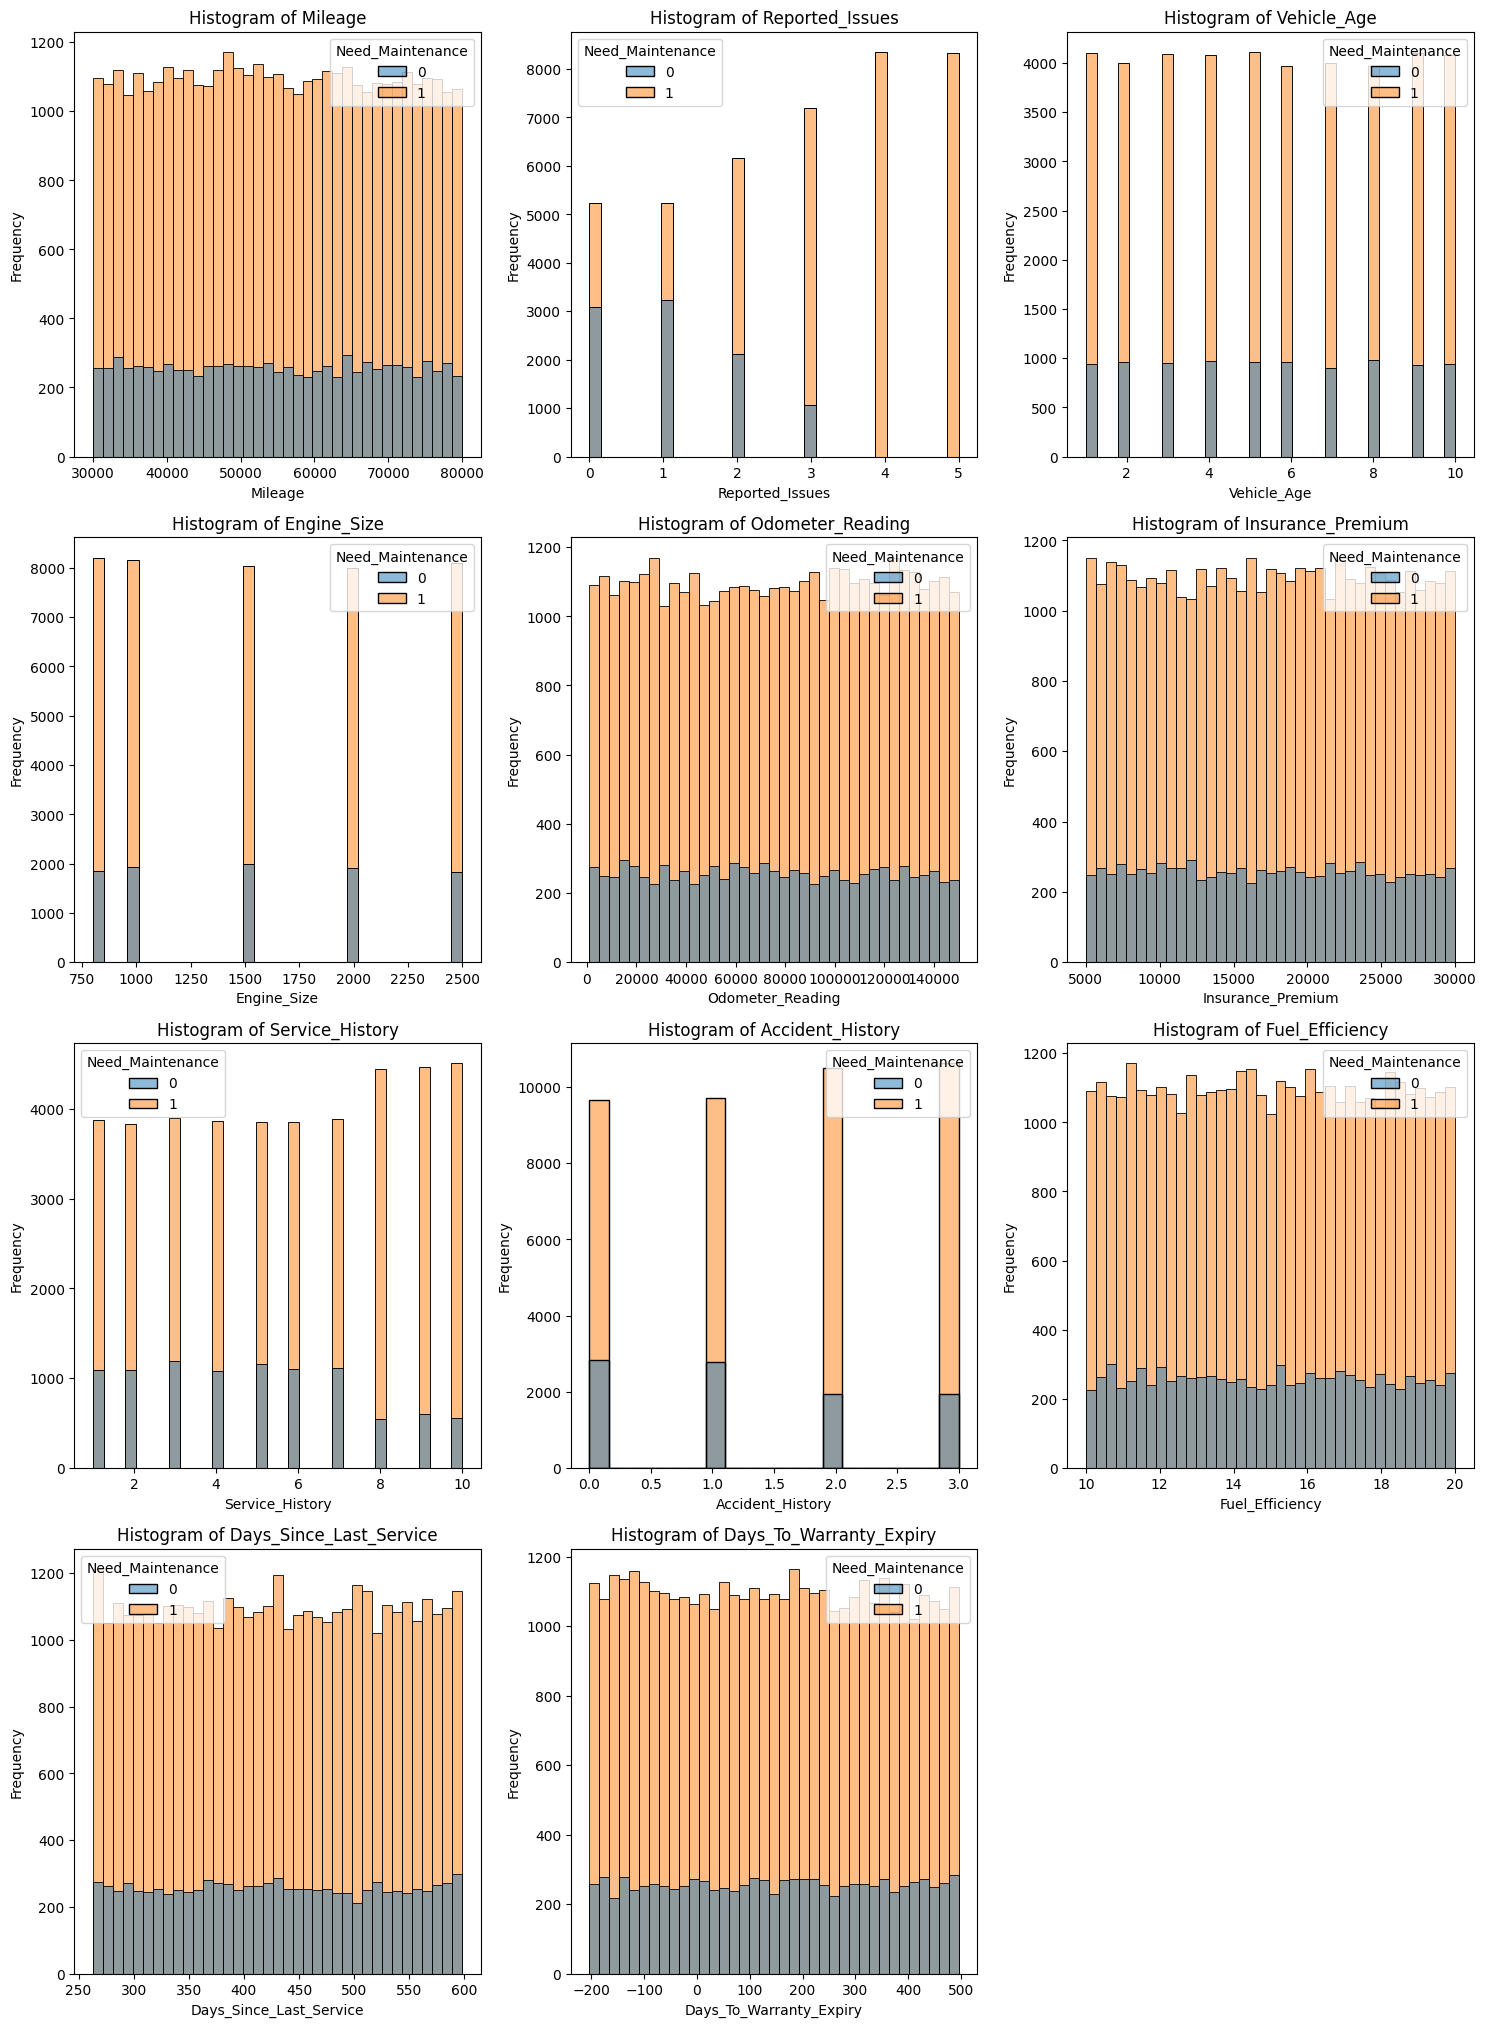

In [73]:
num_features = len(num_feats)
ncols = 3
nrows = (num_features // ncols) + (num_features % ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()

for i, feat in enumerate(num_feats):
    sns.histplot(data=df, x=feat, hue=target, ax=axes[i])
    axes[i].set_title(f"Histogram of {feat}")
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Heatmap of Correlation Matrix

In [74]:
df_encoded = df.copy()
encoder = OrdinalEncoder()
df_encoded[cat_feats] = encoder.fit_transform(df_encoded[cat_feats])

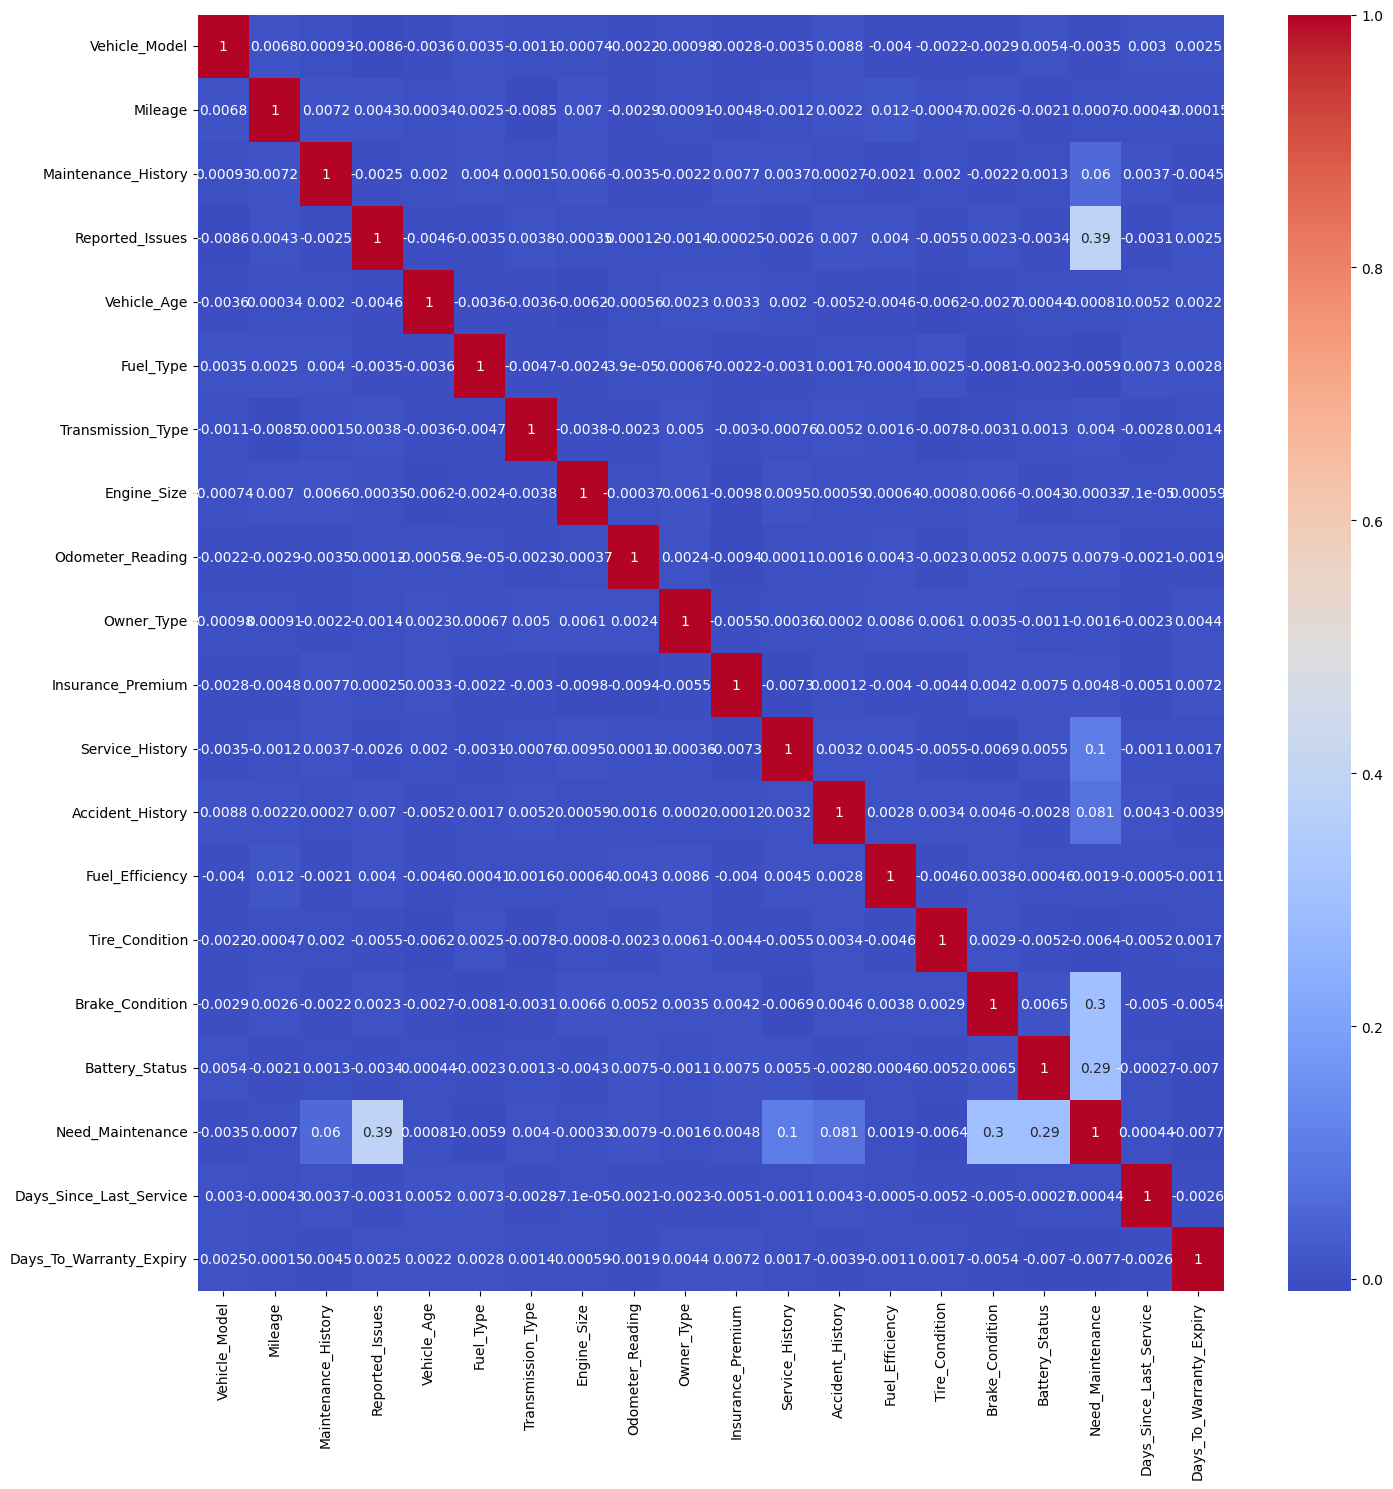

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

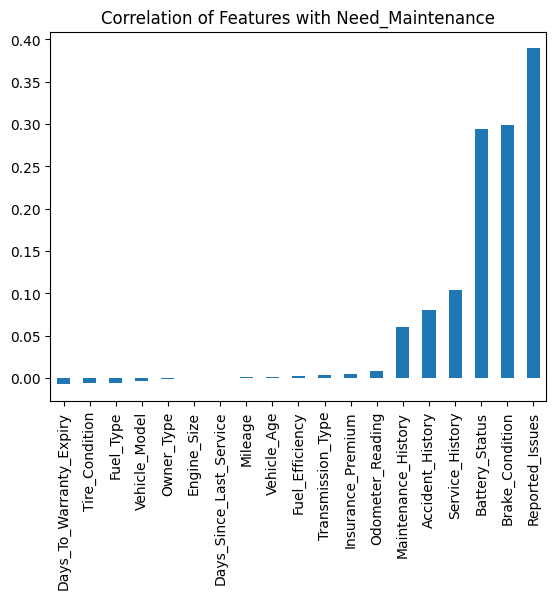

In [76]:
df_encoded.corr()["Need_Maintenance"].sort_values().iloc[:-1].plot(kind='bar')
plt.title("Correlation of Features with Need_Maintenance")
plt.show()

# Checking Outliers using Boxplot

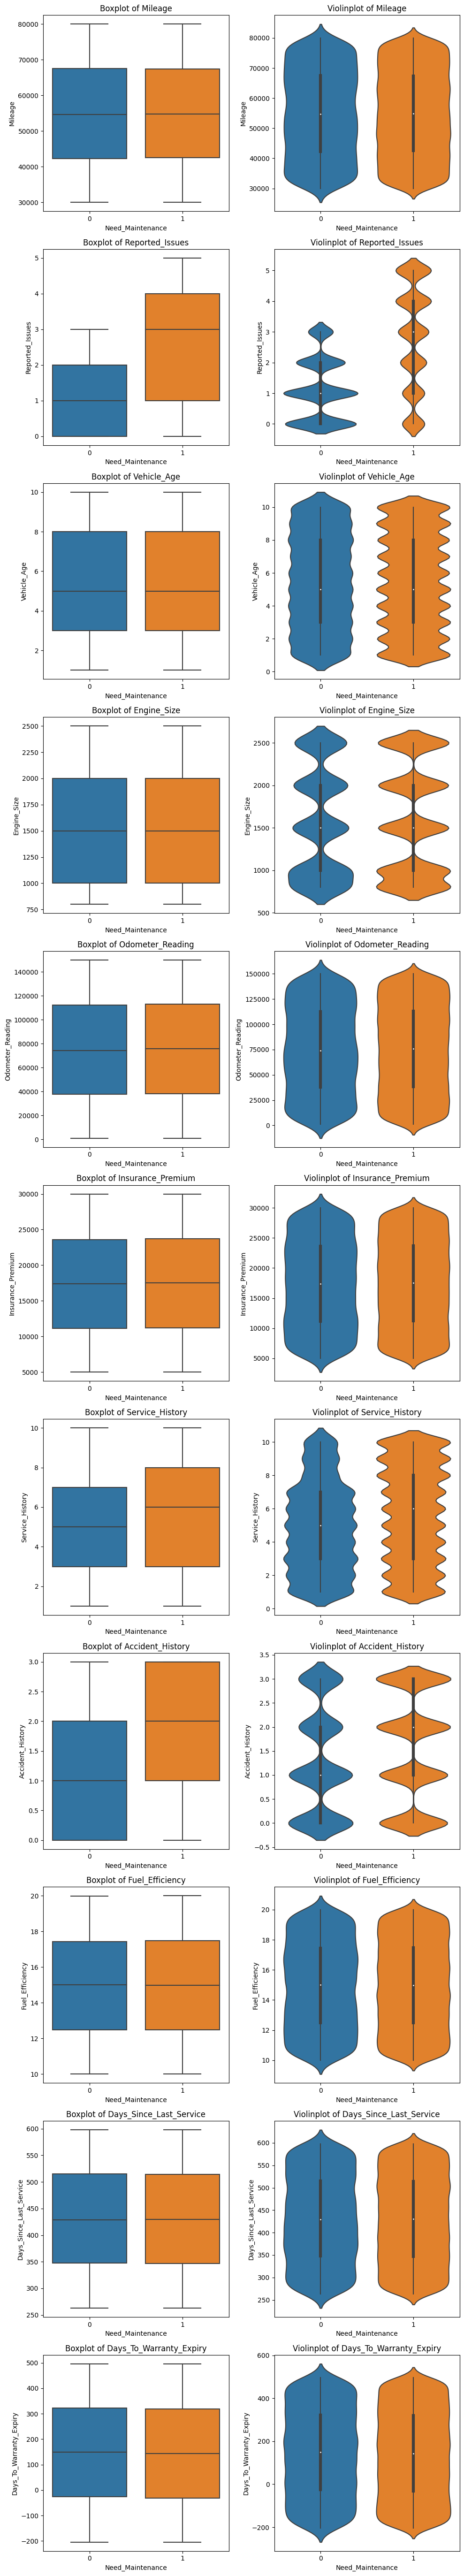

In [77]:
n_rows = len(num_feats)
n_cols = 2

plt.figure(figsize=(10, 5 * n_rows))

for i, feat in enumerate(num_feats):
    plt.subplot(n_rows, n_cols, 2*i + 1)
    sns.boxplot(df, x=target, y=feat)
    plt.title(f'Boxplot of {feat}')
    plt.subplot(n_rows, n_cols, 2*i + 2)
    sns.violinplot(df, x=target, y=feat)
    plt.title(f'Violinplot of {feat}')

plt.tight_layout()
plt.show()

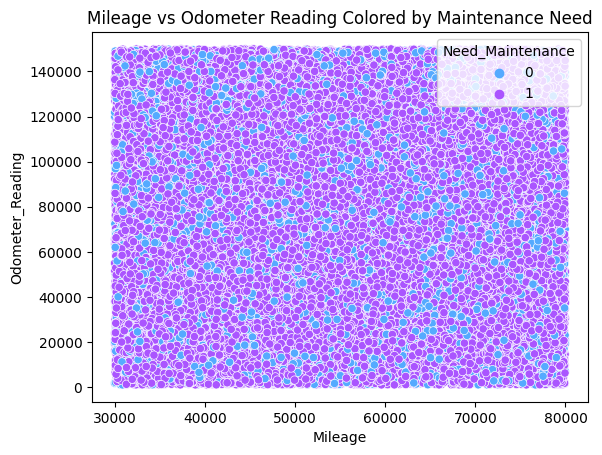

In [78]:
sns.scatterplot(x='Mileage', y='Odometer_Reading', hue='Need_Maintenance', data=df_encoded, palette='cool')
plt.title("Mileage vs Odometer Reading Colored by Maintenance Need")
plt.show()

# ML Modelling

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [90]:
X = df_encoded.drop("Need_Maintenance", axis=1)
y = df_encoded["Need_Maintenance"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [92]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [93]:
preds = gb_model.predict(X_train)
print(confusion_matrix(y_train, preds))
print(classification_report(y_train, preds))

[[ 6366     0]
 [    0 27134]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6366
           1       1.00      1.00      1.00     27134

    accuracy                           1.00     33500
   macro avg       1.00      1.00      1.00     33500
weighted avg       1.00      1.00      1.00     33500



In [94]:
preds = gb_model.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[ 3136     0]
 [    0 13364]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3136
           1       1.00      1.00      1.00     13364

    accuracy                           1.00     16500
   macro avg       1.00      1.00      1.00     16500
weighted avg       1.00      1.00      1.00     16500



This seems to be a sign of Overfitting. 
The model might be memorizing the training data instead of learning generalizable patterns.
As a result, it performs perfectly on the test set if the test data is similar to the training data.

It might also be the case that the data provided is really simple, and certain features can completely describe the data.